# Bike Sharing Linear Regression Assignment

### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants to know —

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands.


### Business Goal:

We need to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


### Steps Followed:
1. Data understanding, preparation 
2. EDA
3. Data preparation
4. Model building and evaluation
5. Residual Analysis
6. Prediction & evaluation on the test

#### Data dictionary
	
* instant: record index
* dteday : date
* season : season (1:spring, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2018, 1:2019)
* mnth : month ( 1 to 12)
* holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : temperature in Celsius
* atemp: feeling temperature in Celsius
* hum: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered
    

## 1. Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import r2_score
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [5]:
import warnings
warnings.filterwarnings('ignore')

## 2. Data understanding, preparation

### 2.1. Creating a dataset

In [6]:
bike_sharing_df = pd.read_csv('day.csv',low_memory=False)

### 2.2. Data understanding

In [7]:
# checking the shape of the dataset     

bike_sharing_df.shape

(730, 16)

In [8]:
#checking dataframe for null and datatypes 
bike_sharing_df.info(show_counts=True,verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# sample records
bike_sharing_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Looking at the descriptive statistics of the data
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 2.3. Data quality checks & Data Cleaning

In [11]:
# Function to get dataset info,datatype, unique values etc
def dataframe_details(df):
    temp_df = pd.DataFrame({'column_name': df.columns,
                            'data_type': df.dtypes,
                            'total_count':df.count(),
                            'uniq_value_count':df.nunique(),
                            'missing_count': df.isnull().sum() ,
                            'missing_percent':round(df.isnull().mean() * 100,2) ,
                            'sample_values':df.apply(lambda col: col.unique()[0:10])
                            }
                            ,columns = ['column_name', 'data_type', 'total_count','uniq_value_count','missing_count','missing_percent','sample_values']
                                 )
    temp_df.sort_values(['missing_percent','column_name'], inplace=True ,ascending= False)
    temp_df.reset_index(drop=True,inplace=True)
    return temp_df

df_details = dataframe_details(bike_sharing_df)
df_details.sort_values('uniq_value_count', inplace=True, ascending= True)
df_details

,column_name,data_type,total_count,uniq_value_count,missing_count,missing_percent,sample_values
0,yr,int64,730,2,0,0.0,"[0, 1]"
1,workingday,int64,730,2,0,0.0,"[0, 1]"
11,holiday,int64,730,2,0,0.0,"[0, 1]"
4,weathersit,int64,730,3,0,0.0,"[2, 1, 3]"
6,season,int64,730,4,0,0.0,"[1, 2, 3, 4]"
3,weekday,int64,730,7,0,0.0,"[6, 0, 1, 2, 3, 4, 5]"
8,mnth,int64,730,12,0,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
5,temp,float64,730,498,0,0.0,"[14.110847, 14.902598, 8.050924, 8.2, 9.305237..."
10,hum,float64,730,594,0,0.0,"[80.5833, 69.6087, 43.7273, 59.0435, 43.6957, ..."
14,casual,int64,730,605,0,0.0,"[331, 131, 120, 108, 82, 88, 148, 68, 54, 41]"


> #### Inference: 

From above result ,we can see that there are 
 1. No missing values
 2. weathersit column is having 3 distinct values only in the dataset.Hence value 4 is missing as per data dictionary.


In [12]:
# Dropping columns which are not useful
columns_to_drop = ['instant'      #--> is just a row instance identifier.
                   ,'dteday'      #--> its removed because we have some of date features like mnth and year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes
                   ,'casual'      #--> dropped since 'casual' and 'registered' columns are included in 'cnt' column
                   ,'registered'  #--> dropped since 'casual' and 'registered' columns are included in 'cnt' column
]
bike_sharing_df.drop(columns= columns_to_drop , axis= 1 , inplace= True)

In [13]:
# Check for duplicates after dropping columns
set(bike_sharing_df.duplicated().values) 
 # no Duplicates were found

{False}

## 3. EDA

In [14]:
categorical_vars = df_details[df_details.uniq_value_count<=50]['column_name'].values.tolist()
numerical_vars = df_details[(df_details.uniq_value_count>50) & (~df_details.column_name.isin(columns_to_drop))]['column_name'].values.tolist()
print("Category variables:{}".format(categorical_vars))
print("Numerical variables:{}".format(numerical_vars))

Category variables:['yr', 'workingday', 'holiday', 'weathersit', 'season', 'weekday', 'mnth']
Numerical variables:['temp', 'hum', 'windspeed', 'atemp', 'cnt']


#### 3.1. Visualize categorical variables

In [15]:
# Categorical variables handling

bike_sharing_df.season = bike_sharing_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_sharing_df.mnth = bike_sharing_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_sharing_df.weekday = bike_sharing_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_sharing_df.weathersit = bike_sharing_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
bike_sharing_df[['season','mnth','weekday','weathersit']]= bike_sharing_df[['season','mnth','weekday','weathersit']].apply(lambda x: x.astype('category') )
bike_sharing_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


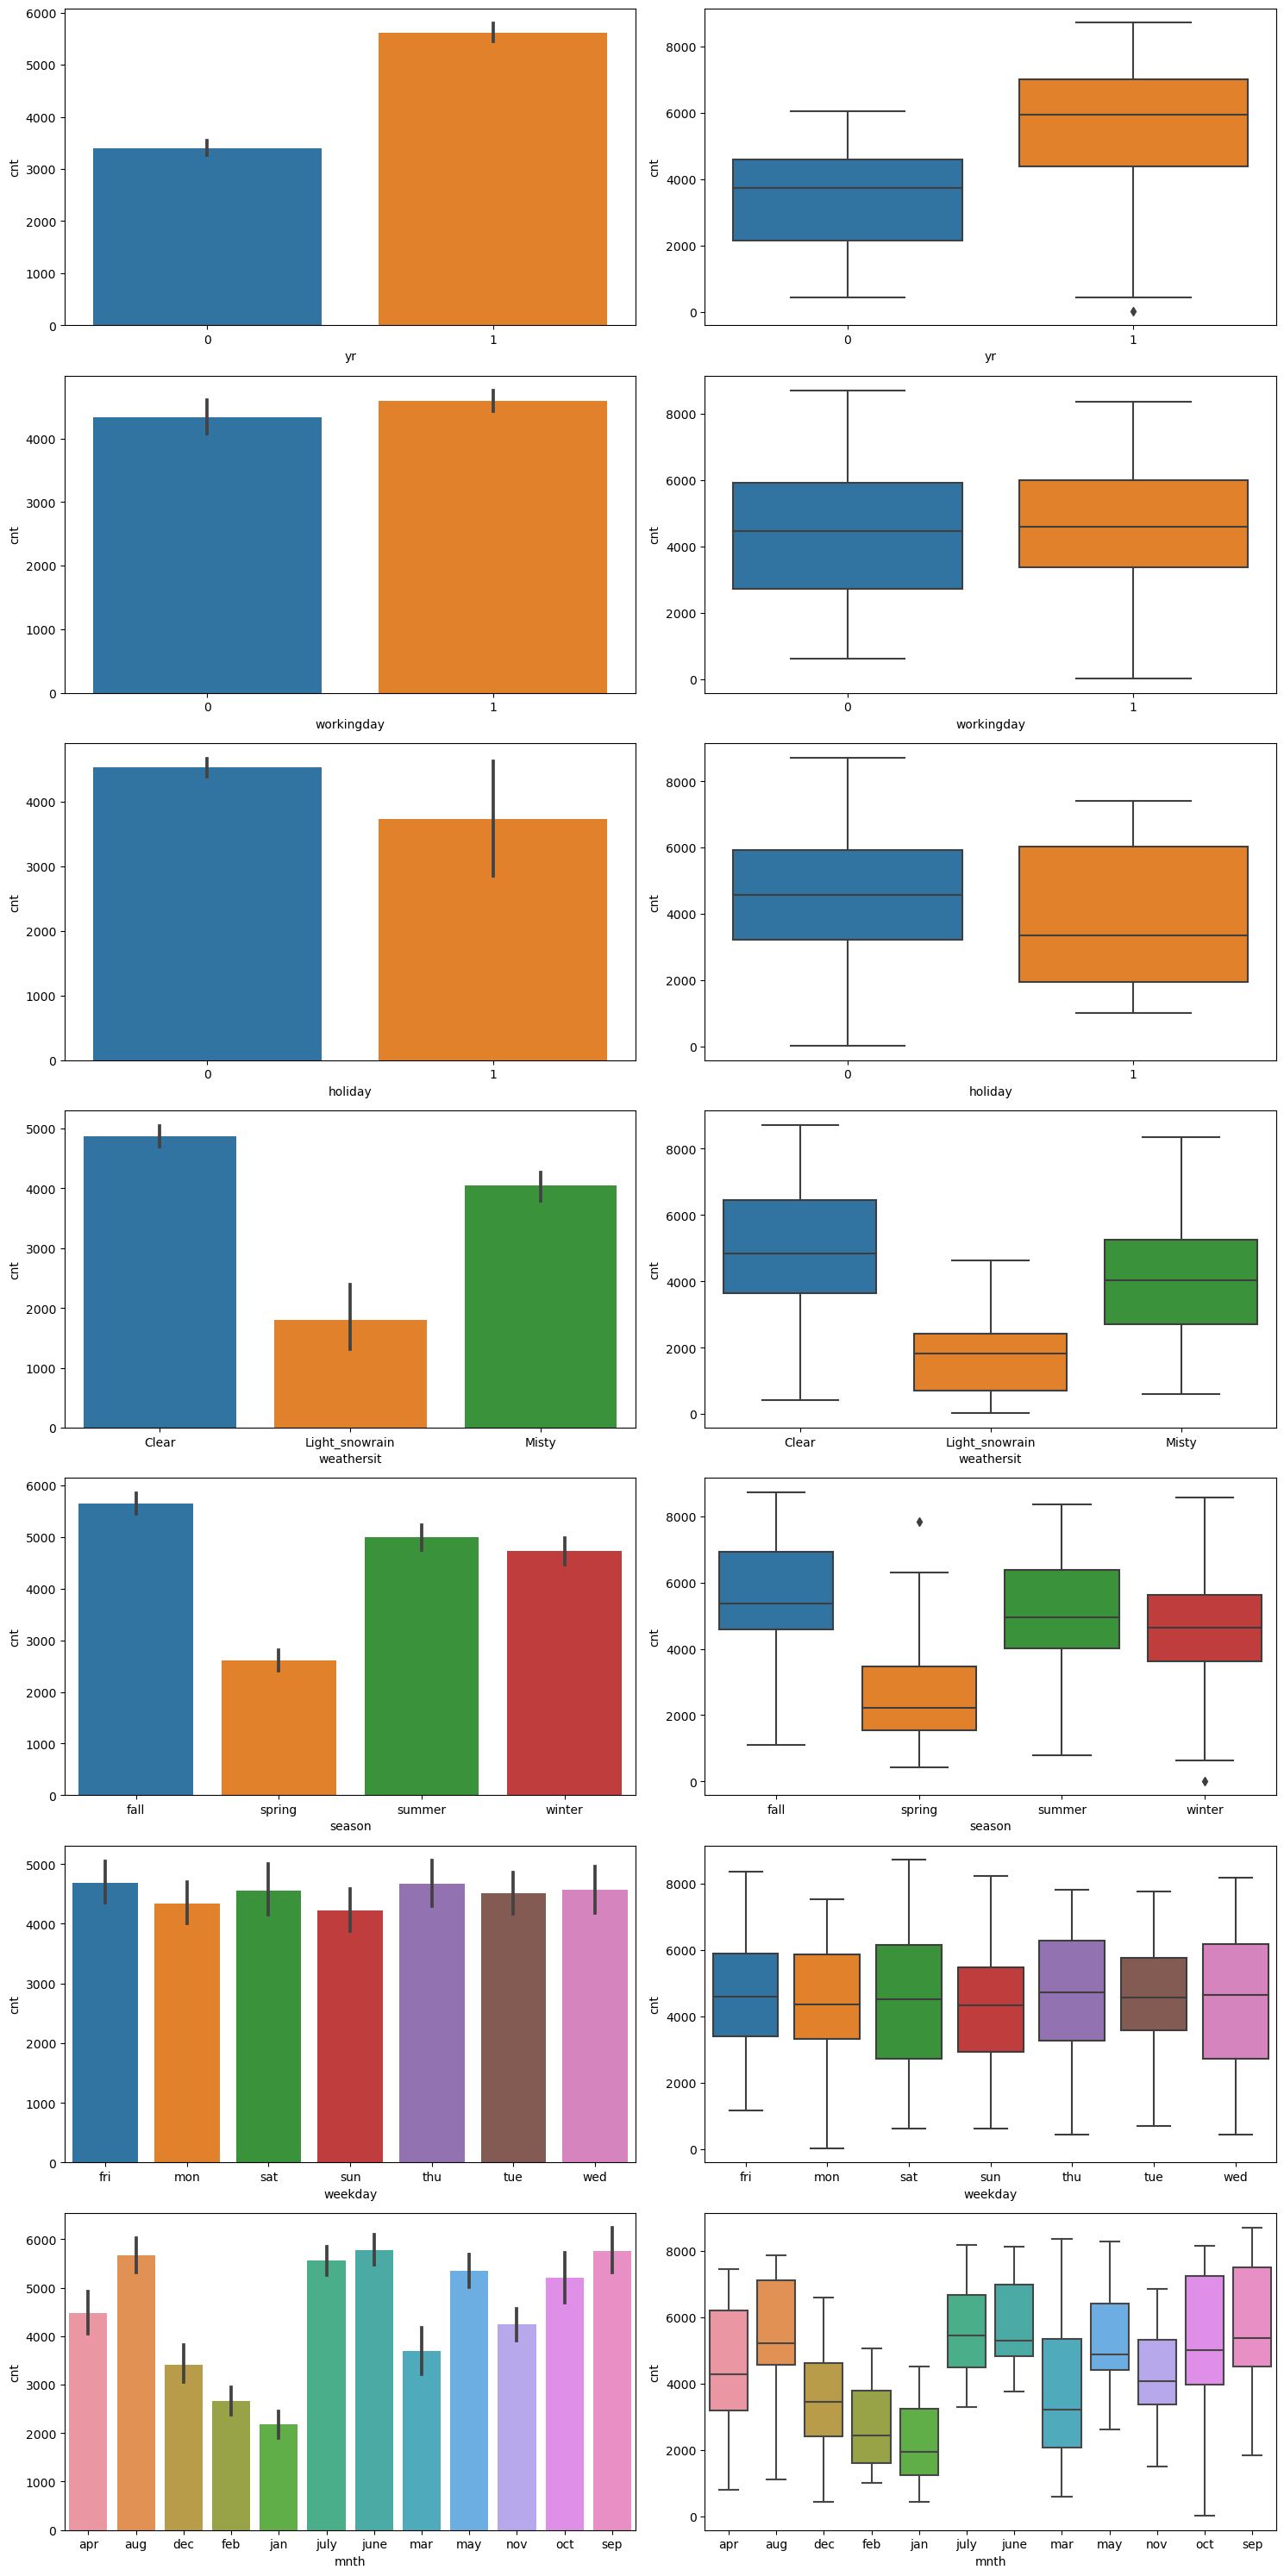

In [17]:

fig = plt.figure(figsize = (15,30))

i=1
for col in categorical_vars:
    plt.subplot(7,2,i)
    sns.barplot(x= col,y= 'cnt',data= bike_sharing_df)
    i=i+1

    plt.subplot(7,2,i)
    sns.boxplot(x=col,y= 'cnt', data= bike_sharing_df)
    i = i+1

plt.tight_layout()
plt.show()

> #### Inference

1. yr - Booking has increased in year 2019 as compared to 2018. Shows good trend in general.
2. workingday - Rental bookings are almost same on working and non-working day.
3. holiday - Attracted more booking even on non-holiday
4. weathersit - Clearly more bookings on Clear/FewClouds and Mist Cloud. Lowest booking on Light Snow/Thunderstorm days
5. season - Fall season has more booking for rental bikes
6. mnth - With in an year , July month has atracted more rentals. But in general most bookings are done from May- Oct
7. weekday - Almost same distribution of rentals across whole week.

    


#### 3.2. Visualize numerical variables

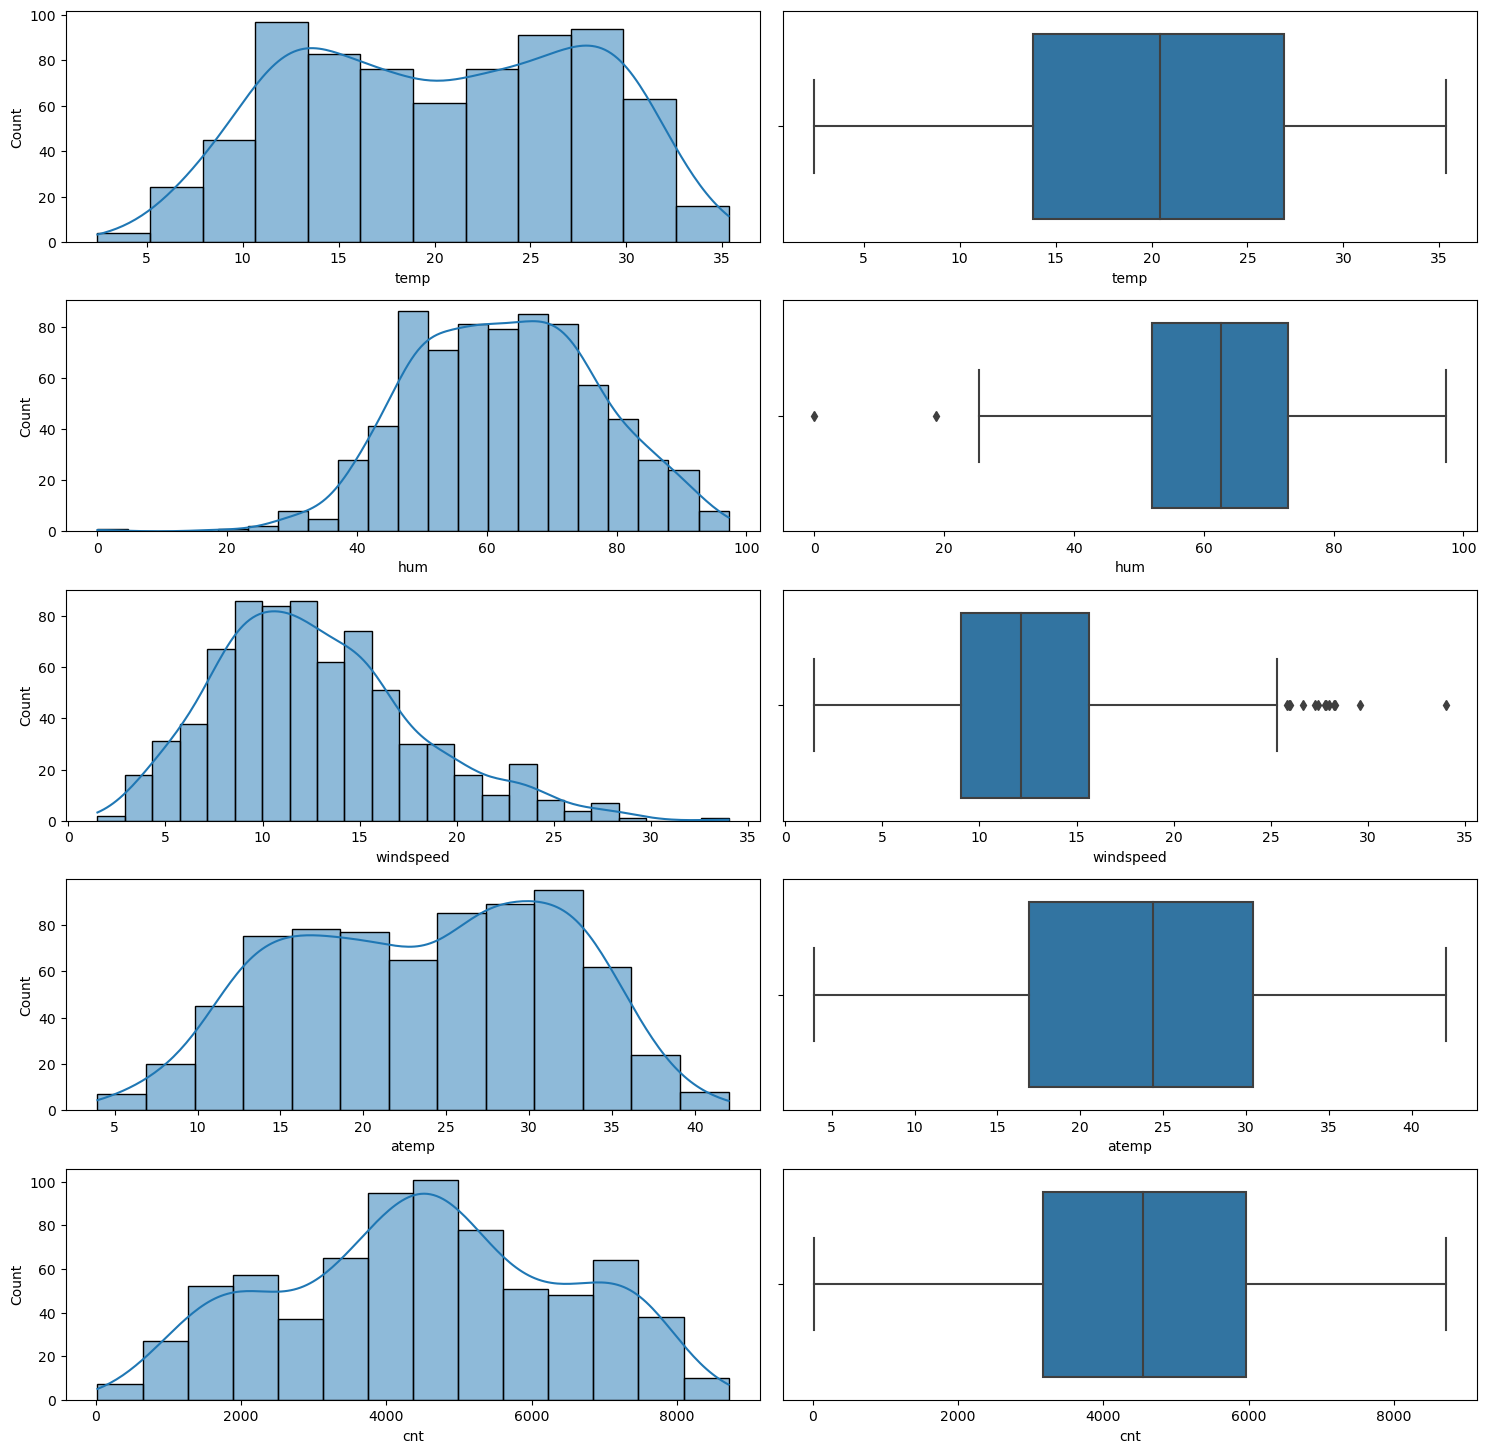

In [18]:
# Outlier analysis for cntinuous variables
fig = plt.figure(figsize = (15,20))

i=1
for col in numerical_vars:
    plt.subplot(7,2,i)
    sns.histplot(data= bike_sharing_df[col],kde=True)
    i=i+1

    plt.subplot(7,2,i)
    sns.boxplot(x=col, data=bike_sharing_df)
    i = i+1

plt.tight_layout()
plt.show()

> #### Inference

From the above plots, we can observe that no prominent outliers are present, hence, not treating outlier in this section.


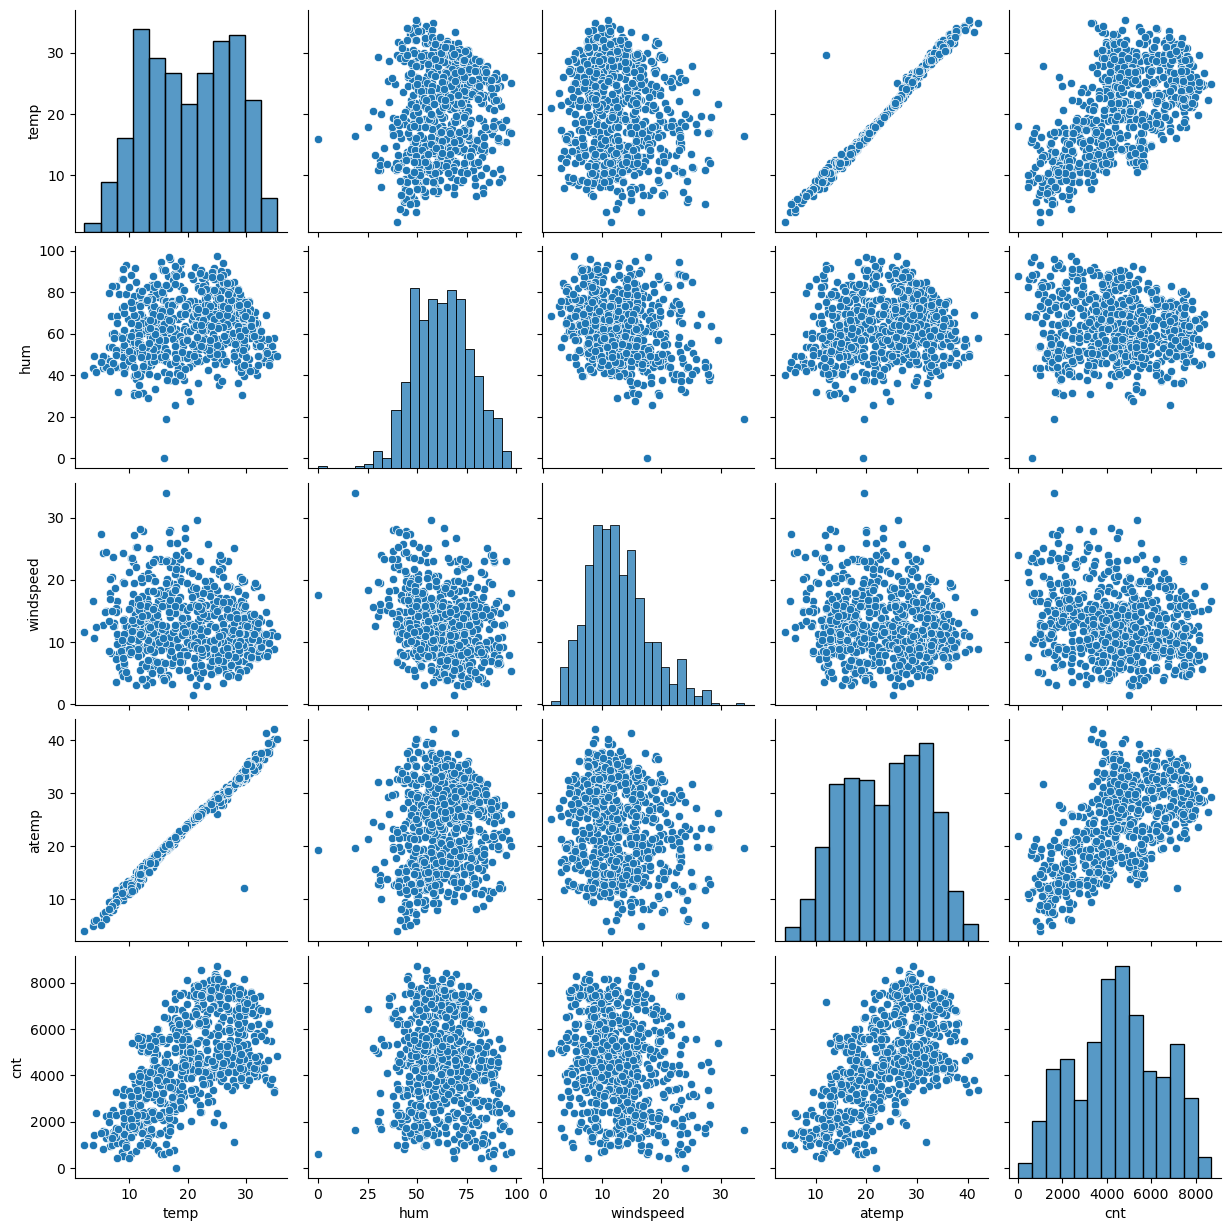

In [19]:
#Pairplot for all numerical variables
sns.pairplot(data = bike_sharing_df[numerical_vars]  )
plt.show()

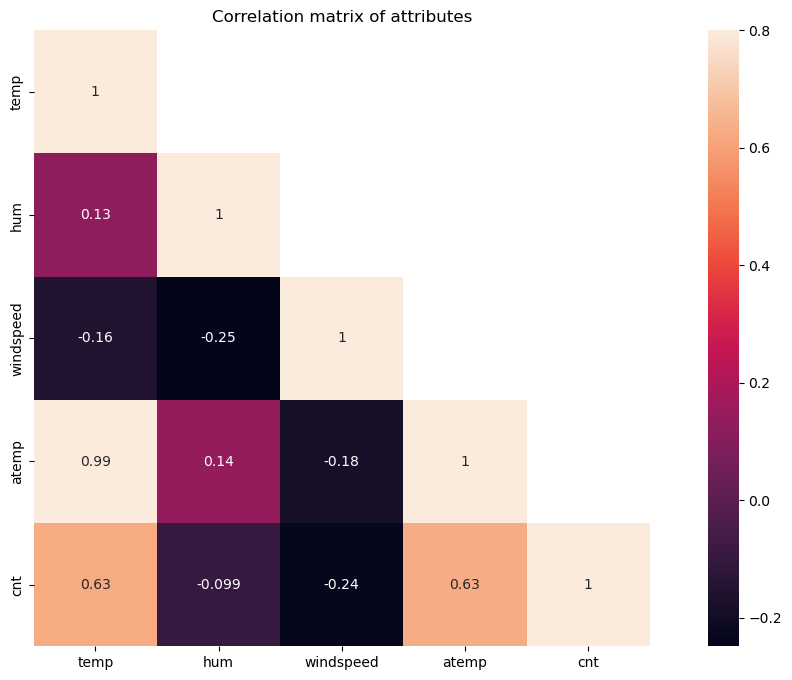

In [20]:
# Checking the correlation between the numerical variables

#Create the correlation matrix
corr_matrix=bike_sharing_df[numerical_vars].corr()
mask=np.array(corr_matrix)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(corr_matrix,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

> #### Inference

1. From above pairplot, we can see that there is a linear relationship between temp,atemp and cnt.
2. From correlation plot, we can observe that temp and atemp are highly positively correlated to each other, it means that both are carrying same information.So, we are going to ignore atemp variable for further analysis.

In [21]:
# Dropping atemp column
bike_sharing_df.drop(columns= ['atemp'] , axis= 1 , inplace= True)
corr_matrix.drop(columns= ['atemp'] , axis= 1 , inplace= True)
corr_matrix.drop(index= ['atemp'] , axis= 0 , inplace= True)
numerical_vars.remove('atemp')

## 4. Statistical Feature Selection
### 4.1. Statistical Feature Selection for Numerical variables

In [22]:
numerical_vars

['temp', 'hum', 'windspeed', 'cnt']

### 4.2. Statistical Feature Selection for Categorical variables

In [23]:
categorical_vars

['yr', 'workingday', 'holiday', 'weathersit', 'season', 'weekday', 'mnth']

### 4.3. Final list of features/predictors for Machine Learning

In [24]:
final_selected_features= categorical_vars + numerical_vars #['temp','season', 'mnth', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']

bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


## 5. Data Preparation
### 5.1. Dummy variables creation

In [25]:
# This code does below 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_sharing_df = pd.get_dummies(data= bike_sharing_df, drop_first=True)
bike_sharing_df.info()

# Note: Above code will automatically pick the variables mnth, season, weekday, weathersit as they are already converted to category datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   hum                        730 non-null    float64
 5   windspeed                  730 non-null    float64
 6   cnt                        730 non-null    int64  
 7   season_spring              730 non-null    uint8  
 8   season_summer              730 non-null    uint8  
 9   season_winter              730 non-null    uint8  
 10  mnth_aug                   730 non-null    uint8  
 11  mnth_dec                   730 non-null    uint8  
 12  mnth_feb                   730 non-null    uint8  
 13  mnth_jan                   730 non-null    uint8  

In [26]:
bike_sharing_df.shape

(730, 29)

### 5.2. Splitting the Data into Training and Testing Sets

In [27]:
# splitting the dataframe into Train and Test
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing_df, train_size = 0.7, random_state = 100)



# check the shape of training and test datatset
print(df_train.shape,df_test.shape)


(510, 29) (220, 29)


### 5.3. Feature Scaling continuous variables

In [28]:
 # instantiate an object
scaler = MinMaxScaler()

# Fit on data
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars]) 
df_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


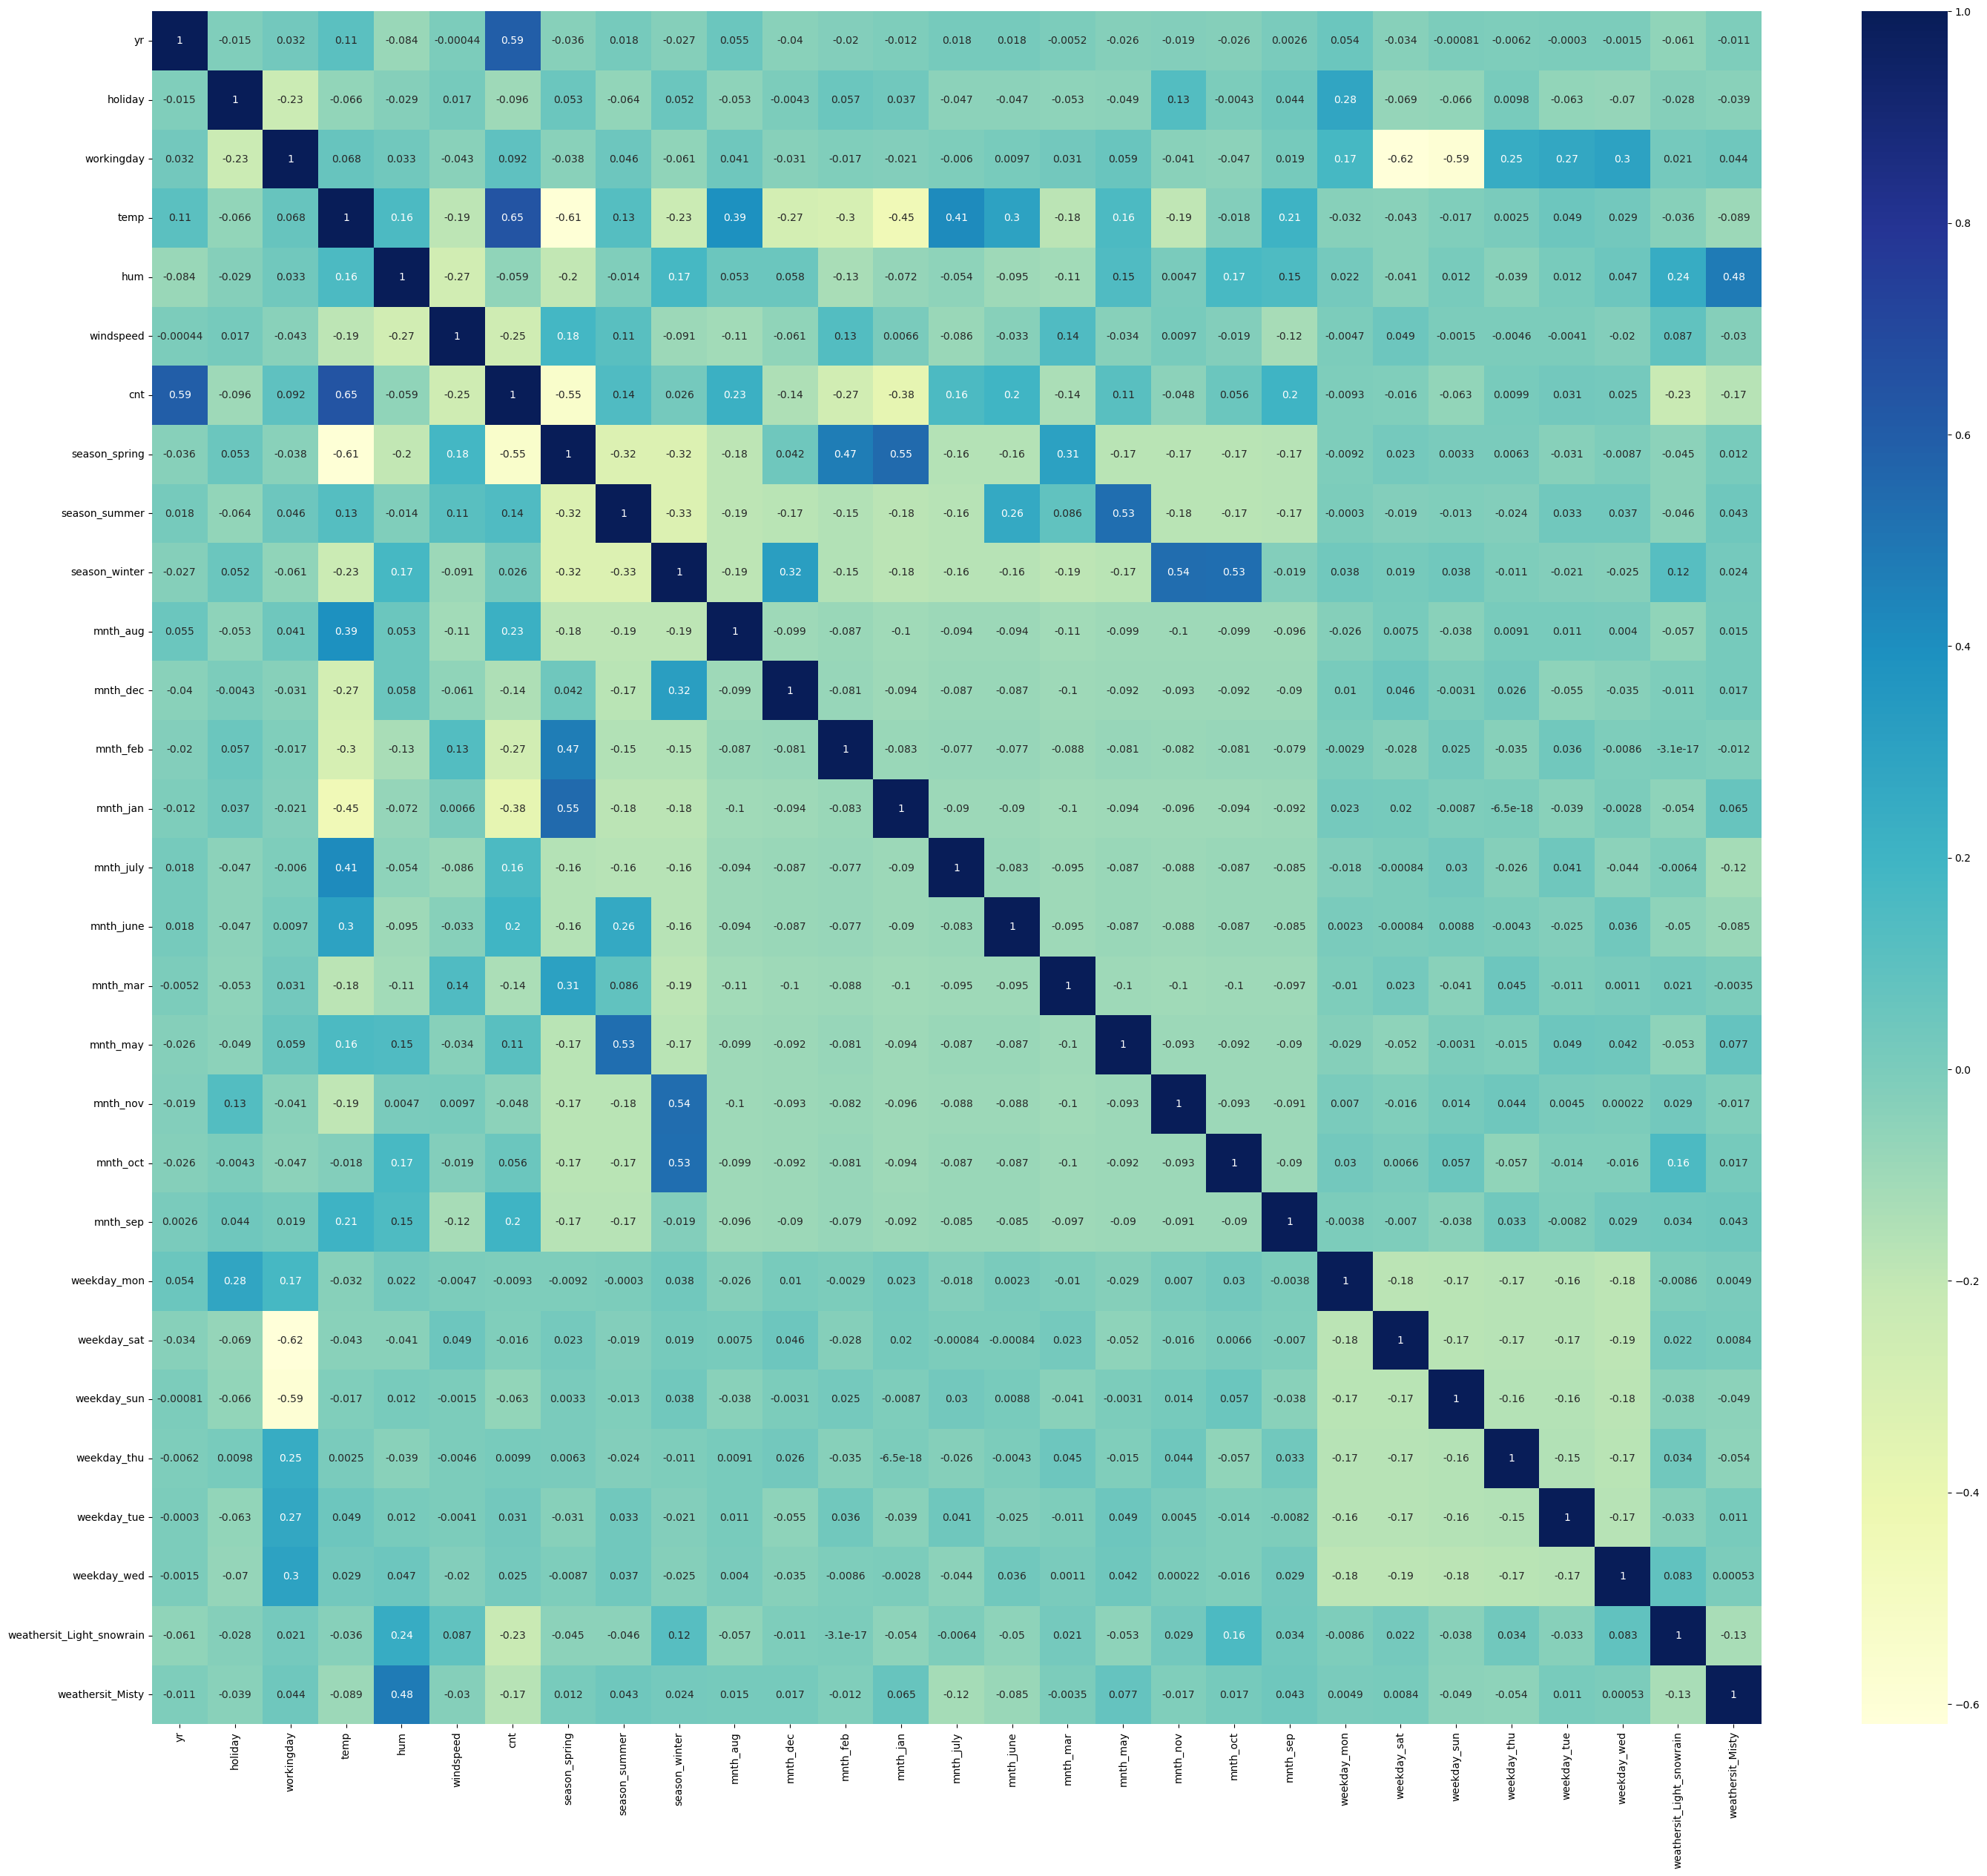

In [29]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (35, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

> #### Inference
From above, we can see that `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

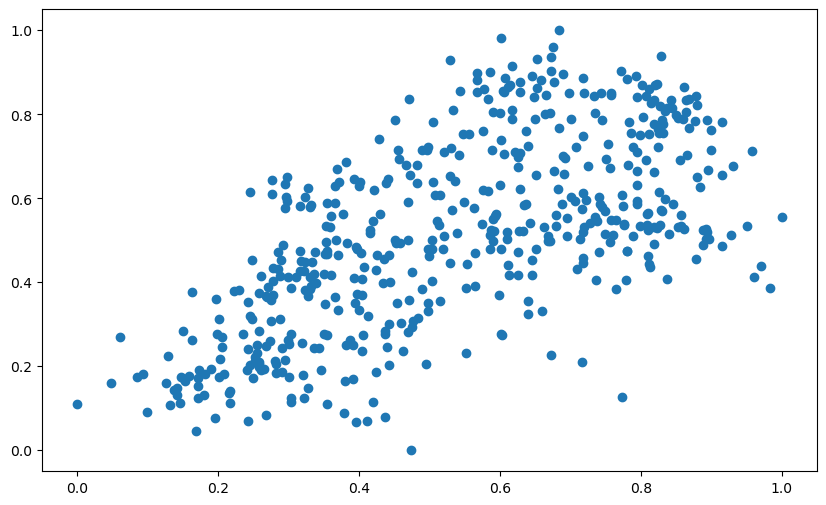

In [30]:
plt.figure(figsize=[10,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

## 6. Model building & Evaluation

Here,we will build the model using all variables

In [31]:
# X and y variables

y_train = df_train.pop('cnt')
X_train = df_train 

X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df_train.shape

(510, 28)

In [33]:
# Function for building model using statsmodel, for the detailed statistics
def model_sm(X_tr,y_tr,):
    # Add a constant
    X_tr_sm = sm.add_constant(X_tr)

    # Create a first fitted model
    lr = sm.OLS(y_tr, X_tr_sm).fit()

    print("Parameters obtained are:")
    print(lr.params)
    
    # Model Summary
    print(lr.summary())
    return lr

In [34]:
model_sm(X_train,y_train)

Parameters obtained are:
const                        0.243106
yr                           0.232438
holiday                      0.010042
workingday                   0.096177
temp                         0.445359
hum                         -0.151473
windspeed                   -0.186010
season_spring               -0.044834
season_summer                0.043002
season_winter                0.107632
mnth_aug                     0.020376
mnth_dec                    -0.044277
mnth_feb                    -0.032441
mnth_jan                    -0.063315
mnth_july                   -0.033848
mnth_june                    0.004602
mnth_mar                     0.001274
mnth_may                     0.024673
mnth_nov                    -0.039879
mnth_oct                     0.007546
mnth_sep                     0.085938
weekday_mon                 -0.020931
weekday_sat                  0.095554
weekday_sun                  0.041333
weekday_thu                 -0.009131
weekday_tue              

> #### Inference

From above ,we can see that Adjusted `R-Square` is 0.844 which is a good value.
Next,we will try to reduce the number of features and exclude those which are not much relevant in explaining the target variable. 

#### Model-1 using "Recursive feature elimination(RFE)" 

-Use Recursive feature elimination to discover top predictor variables.

-RFE is an automated approach which helps in removing the least important features and thus reduce the training time, and increase the interpretability of the model.


In [35]:
# Function for building model using sklearn
def model_lm(X_tr,y_tr,n_featr_to_select):
    # Running RFE with the output number of the variable equal to n_features_to_select
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select= n_featr_to_select) 

    # Fit with n_features_to_select features
    rfe.fit(X_tr, y_tr)
    
    return rfe


In [36]:
# Running RFE with the output number of the variable equal to 15
rfe_1 = model_lm(X_train,y_train,15)

#list the top n_features_to_select variables selected using RFE technique
list(zip(X_train.columns,rfe_1.support_,rfe_1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 11),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [37]:
#Printing the Columns selected by RFE.
col_1 = X_train.columns[rfe_1.support_].to_list()
col_1

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_jan',
 'mnth_july',
 'mnth_sep',
 'weekday_sat',
 'weathersit_Light_snowrain',
 'weathersit_Misty']

#### Model-1 Evaluation

In [38]:
# Checking summary using Statsmodels

# Subsetting training data for 15 selected columns
X_train_rfe_1 = X_train[col_1].copy()

model_sm(X_train_rfe_1,y_train)

Parameters obtained are:
const                        0.251893
yr                           0.230527
holiday                     -0.058173
workingday                   0.043335
temp                         0.509619
hum                         -0.156299
windspeed                   -0.186259
season_spring               -0.050897
season_summer                0.050762
season_winter                0.093301
mnth_jan                    -0.034512
mnth_july                   -0.052918
mnth_sep                     0.081395
weekday_sat                  0.053552
weathersit_Light_snowrain   -0.247464
weathersit_Misty            -0.056318
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 15 Mar 202

#### Calculate VIF

In [39]:
#Function to calculate VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [40]:
#VIF values
calculateVIF(X_train_rfe_1)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
14,weathersit_Misty,2.29
0,yr,2.09
12,weekday_sat,1.98


> #### Inference

1. Adjusted R-Square is 0.844
2. All the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But  there are a few variables which have VIF > 5, so we will have to drop some features.

#### Model-2 using "Recursive feature elimination(RFE)" 


In [41]:
# Running RFE with the output number of the variable equal to 9
rfe_2 = model_lm(X_train,y_train,9)

#list the top n_features_to_select variables selected using RFE technique
list(zip(X_train.columns,rfe_2.support_,rfe_2.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 3),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', False, 9),
 ('mnth_feb', False, 10),
 ('mnth_jan', False, 7),
 ('mnth_july', False, 2),
 ('mnth_june', False, 19),
 ('mnth_mar', False, 20),
 ('mnth_may', False, 11),
 ('mnth_nov', False, 8),
 ('mnth_oct', False, 18),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 14),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 13),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 15),
 ('weekday_wed', False, 17),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', False, 4)]

In [42]:
#Printing the Columns selected by RFE.
col_2 = X_train.columns[rfe_2.support_].to_list()
col_2

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_sep',
 'weathersit_Light_snowrain']

#### Model-2 Evaluation

In [43]:
# Checking summary using Statsmodels

# Subsetting training data for 8 selected columns
X_train_rfe_2 = X_train[col_2].copy()

model_sm(X_train_rfe_2,y_train)

Parameters obtained are:
const                        0.268217
yr                           0.226845
holiday                     -0.091536
temp                         0.592835
hum                         -0.278436
windspeed                   -0.203409
season_summer                0.089160
season_winter                0.143423
mnth_sep                     0.105193
weathersit_Light_snowrain   -0.194782
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.2
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.74e-186
Time:                        22:24:43   Log-Likelihood:                 490.74
No. Observations:                 510   AIC:                            -961.5
Df Residuals:              

In [44]:
#VIF values
calculateVIF(X_train_rfe_2)

,Features,VIF
3,hum,10.02
2,temp,7.11
4,windspeed,3.54
0,yr,2.01
6,season_winter,1.64
5,season_summer,1.58
7,mnth_sep,1.20
8,weathersit_Light_snowrain,1.09
1,holiday,1.04


> #### Inference

2nd Model with 8 features has Adjusted `R-Square` as 0.827 which do not show any significant reduction when compared to the model(Adjusted `R-Square`= 0.844) having all features.Hence, we can proceed with Model-2 and try to eliminate variables having VIF>5 .

In [45]:
# Let's drop the 'hum' column
X_train_rfe_2.drop(columns =['hum'],axis=1,inplace=True)
col_2.remove('hum')
X_train_rfe_2.head()

,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_sep,weathersit_Light_snowrain
576,1,0,0.815169,0.264686,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0
728,1,0,0.245101,0.663106,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0
111,0,0,0.345824,0.380981,1,0,0,0


In [46]:
# Evaluating the model after dropping the column- 'hum'

lr_2 = model_sm(X_train_rfe_2,y_train)

Parameters obtained are:
const                        0.087528
yr                           0.233434
holiday                     -0.086667
temp                         0.568212
windspeed                   -0.145477
season_summer                0.081150
season_winter                0.126067
mnth_sep                     0.089499
weathersit_Light_snowrain   -0.253491
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          9.22e-172
Time:                        22:24:44   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                     

In [47]:
#VIF values after dropping the column 'hum'
calculateVIF(X_train_rfe_2)

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,season_summer,1.55
5,season_winter,1.34
6,mnth_sep,1.20
7,weathersit_Light_snowrain,1.06
1,holiday,1.03


> #### Inference 

All the VIF values and p-values are now in the permissible range . Also the `Adjusted R-squared` value has dropped from `0.844` with **28 variables** to just `0.801` using **8 variables**. This model is explaining most of the variance without being too complex. So we will proceed with this model.



## 7. Residual Analysis

In [48]:
# Predicted y values
y_train_pred = lr_2.predict(sm.add_constant(X_train_rfe_2))

In [49]:
#residual
residual = y_train - y_train_pred

Text(0.5, 0, 'Errors')

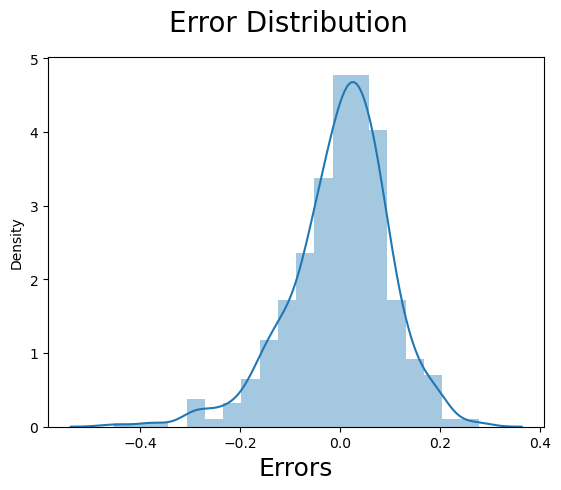

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Error Distribution', fontsize = 20)    
plt.xlabel('Errors', fontsize = 18)      

> #### Inference 

Error is normally distributed with zero mean.


## 8. Making Predictions

Like the training data, we will do the scaling for Test data as well.

In [51]:
# We did the scaling earlier for below variables
numerical_vars

['temp', 'hum', 'windspeed', 'cnt']

In [52]:
# scaling test data
df_test[numerical_vars]=scaler.transform(df_test[numerical_vars])

In [53]:
# X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [54]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [55]:
# Subset the test columns and create a new dataframe 'X_test_rfe_2' using the final list of columns
X_test_rfe_2 = X_test[col_2]

In [56]:
# Add a constant to the test set created
X_test_rfe_2 = sm.add_constant(X_test_rfe_2)
X_test_rfe_2.head()

,const,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_sep,weathersit_Light_snowrain
184,1.0,0,1,0.831783,0.084219,0,0,0,0
535,1.0,1,0,0.901354,0.153728,1,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0


In [57]:
# Making predictions
y_test_pred = lr_2.predict(X_test_rfe_2)

Text(0, 0.5, 'Predictions')

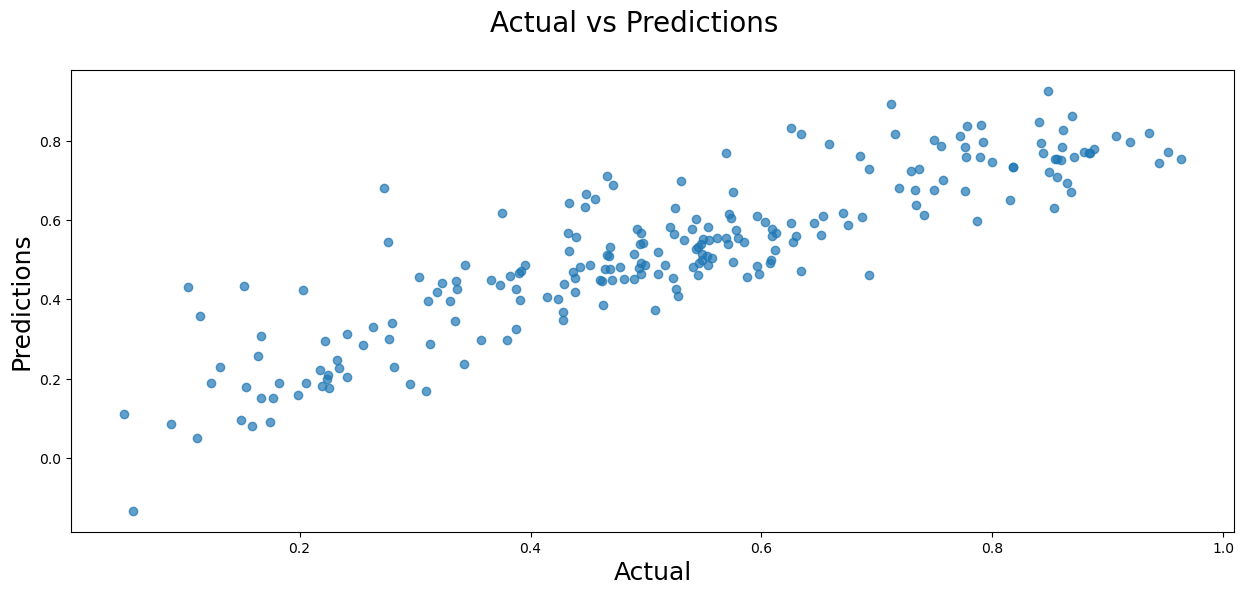

In [58]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(15,6))
plt.scatter(y_test,y_test_pred,alpha=0.7)
fig.suptitle('Actual vs Predictions', fontsize=20)             
plt.xlabel('Actual', fontsize=18)                         
plt.ylabel('Predictions', fontsize=18)  

In [59]:
# Checking r2_score value
r2 = r2_score(y_true= y_test , y_pred = y_test_pred)
r2

0.7720731949554799

Adjusted R-Square can be calculated as per below formula:

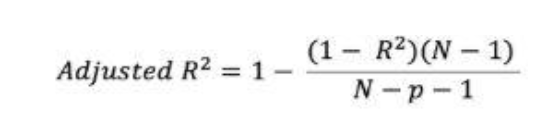

where  N is number of observations in sample and p is number of independent variables in model.

In [60]:
# Calculate Adjusted R-Square
N = X_test.shape[0]
p = len(col_2)

adj_r2_test = 1-((1-r2)*(N-1)/(N-p-1))
print('Adj. R-Squared for Test dataset: ', round(adj_r2_test,3))


Adj. R-Squared for Test dataset:  0.763


> #### Inference 

1. Hence, model with 8 variables is having R-squared value for Training and Test data as `0.804` and `0.772` respectively.
2. Adjusted R-Square for training data is `0.801` and for test data is `0.763`.
3. Final list of features are: 

`
['yr',
 'holiday',
 'temp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_sep',
 'weathersit_Light_snowrain']
 `

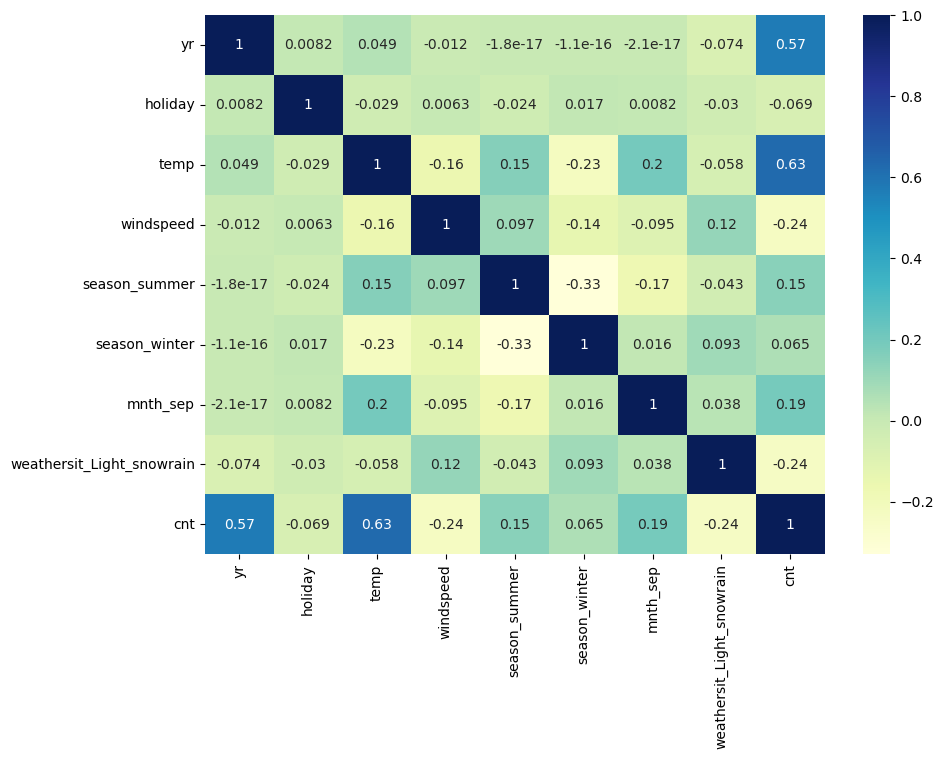

In [61]:
# Checking the correlation bewteen final predictor variables and target variable

plt.figure(figsize = (10, 7))
df_final_pred = bike_sharing_df[['yr',
 'holiday',
 'temp',
 'windspeed',
 'season_summer',
 'season_winter',
 'mnth_sep',
 'weathersit_Light_snowrain', 'cnt']]
sns.heatmap(df_final_pred.corr(), annot = True, cmap="YlGnBu")
plt.show()

## 9. Summary
### Final Linear regression Equation:



Parameters obtained are:
```
const                        0.087528
yr                           0.233434
holiday                     -0.086667
temp                         0.568212
windspeed                   -0.145477
season_summer                0.081150
season_winter                0.126067
mnth_sep                     0.089499
weathersit_Light_snowrain   -0.253491
```

##### y = 0.087 + 0.233 * yr -0.086 * holiday + 0.592 * temp - 0.203 * windspeed + 0.089 * season_summer + 0.143 * season_winter + 0.105 * mnth_sep - 0.194 * weathersit_light_snow




#### Top Variables (5 Variables) Significant in Predicting the Model

From the above analysis, we can conclude that following are the top 5 variables which is recomendeded to give utmost importance while planning to achieve maximum demand.

 temp|weathersit_Light_snowrain|yr|windspeed|season_winter|
 -|-|-|-|-|
 0.568|-0.253|0.233|-0.145|0.126|

